In [38]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
%matplotlib inline


# 1. load the dataset

In [5]:
df = pd.read_csv(r'C:\Users\vasus\Downloads\ML Project - Naive Bayes Loan Status Classification U16955482770.txt')

In [6]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


# 2. check null values

In [7]:
df.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

# 3. print the columns name

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

# 4. create list for all the columns which have null value columns

In [9]:
lis = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# 5. fill all that null values with mean using for loops

In [10]:
for i in lis:
    df[i]=df[i].fillna(df[i].mean())

In [11]:
df.isnull().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

# 6. get data information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


# 7. describe dataset

In [13]:
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,59472.881131,58305.224138,55777.906879,51825.29715,48612.594594,48042.412239,11398.052166,1.675277e+04,10956.873040,9805.177073,9756.444917,11652.208534
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.00000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.00000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000
50%,7483.500000,9.000000,33.000000,11569.000000,12637.000000,13255.000000,13350.00000,12847.000000,13398.500000,512.000000,5.150000e+02,431.000000,367.000000,387.000000,478.000000
75%,18746.250000,21.000000,41.000000,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.00000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


# 8. display box plot for LIMIT_BAL

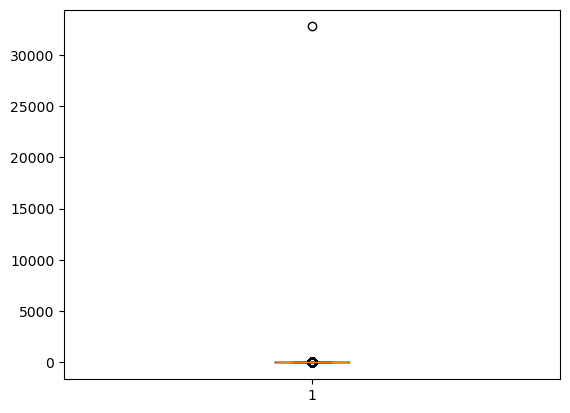

<Figure size 640x480 with 0 Axes>

In [41]:
plt.boxplot(df['LIMIT_BAL'])
plt.show()
plt.figure()

# 9. display box plot for AGE

In [15]:
plt.boxplot(df['AGE'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e437b24190>,
 'caps': [<matplotlib.lines.Line2D at 0x1e437b24410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e437b24050>],
 'medians': [<matplotlib.lines.Line2D at 0x1e437b24690>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e437b247d0>],
 'means': []}

# 10.  plot scatter plot for AGE & LIMIT_BAL

In [16]:
plt.scatter(df['AGE'],df['LIMIT_BAL'])

# 11. plot scatter plot for AGE & LIMIT_BAL

In [17]:
plt.scatter(df['LIMIT_BAL'],df['PAY_AMT6'])

# 12.  find shape of data

In [18]:
df.shape

(30000, 16)

# 13 . perform label encoding on Default Status

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
enc =LabelEncoder()

In [21]:
df['Default Status'] = enc.fit_transform(df['Default Status'])

In [22]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.0,2584.508988,2250.186122,2300.375885,2608.76576,0
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.0,1.000000,1.000000,2300.375885,2.00000,0
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.0,1.000000,1.000000,1.000000,5.00000,1
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.0,12.000000,11.000000,169.000000,1.00000,1
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.0,1.000000,9.000000,689.000000,679.00000,1


# working with model

# 1. create a features and target set

In [23]:
X = df.drop('Default Status',axis=1)
y = df['Default Status']

# 2. split data into training and testing

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
from sklearn.naive_bayes import GaussianNB

# 3. Apply navie bayes classfier

In [26]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

# 4.  testing score

In [27]:
clf.score(X_test,y_test)

0.31583333333333335

# 5. training score

In [28]:
clf.score(X_train,y_train)

0.32458333333333333

In [29]:
 y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

# 6. accuracy score

In [31]:
accuracy_score(y_test,y_pred)

0.31583333333333335

# 7. precision_score

In [32]:
precision_score(y_test,y_pred)

0.8710089399744572

# 8. recall_score

In [33]:
recall_score(y_test,y_pred)

0.14553990610328638

# 9. confusion_matrix

In [35]:
confusion_matrix(y_test,y_pred)

array([[1213,  101],
       [4004,  682]])

# 10 .classification_report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.92      0.37      1314
           1       0.87      0.15      0.25      4686

    accuracy                           0.32      6000
   macro avg       0.55      0.53      0.31      6000
weighted avg       0.73      0.32      0.28      6000

